## Imports

In [1]:
import pandas as pd
import numpy as np
import pickle
import random

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold



/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Set Options

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline
sns.set_style('darkgrid')

random.seed(129)

# Combined Data

## Load Data

In [3]:
df = pickle.load(open('./clean_data/good_gk.pkl', 'rb'))

## Inspect Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 651
Data columns (total 25 columns):
Player                     579 non-null object
Club                       579 non-null object
POS                        579 non-null object
GP                         579 non-null float64
GS                         579 non-null float64
MINS                       579 non-null float64
SHTS                       579 non-null float64
SV                         579 non-null float64
GA                         579 non-null float64
GAA                        579 non-null float64
W                          579 non-null float64
L                          579 non-null float64
T                          579 non-null float64
ShO                        579 non-null float64
Wpct                       579 non-null float64
SvPct                      579 non-null float64
Year                       579 non-null int64
Season                     579 non-null object
PKG                        579 non-nu

In [5]:
pd.concat([df.head(5), df.tail(5)], axis=0)

,Player,Club,POS,GP,GS,MINS,SHTS,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,Year,Season,PKG,PKA,Last Name,First Name,Base Salary,Guaranteed Compensation,Date
0,Bouna Coundoul,COL,GK,30.0,30.0,2668.0,158.0,120.0,32.0,1.07,9.0,12.0,8.0,9.0,30.0,75.9,2007,REG,2.0,2.0,Coundoul,Bouna,30000.00,30000.00,2007-08-31
1,Kevin Hartman,KC,GK,30.0,30.0,2700.0,159.0,110.0,45.0,1.50,11.0,12.0,7.0,5.0,36.7,69.2,2007,REG,6.0,7.0,Hartman,Kevin,150000.00,150000.00,2007-08-31
2,Matt Reis,NE,GK,30.0,30.0,2700.0,169.0,120.0,43.0,1.43,14.0,8.0,8.0,10.0,46.7,71.0,2007,REG,3.0,3.0,Reis,Matt,150000.00,150000.00,2007-08-31
3,Joe Cannon,LA,GK,29.0,29.0,2610.0,171.0,119.0,46.0,1.59,9.0,13.0,7.0,5.0,31.0,69.6,2007,REG,4.0,5.0,Cannon,Joe,192000.00,192000.00,2007-08-31
4,Troy Perkins,DC,GK,29.0,29.0,2610.0,155.0,117.0,32.0,1.10,16.0,6.0,7.0,8.0,55.2,75.5,2007,REG,1.0,3.0,Perkins,Troy,85000.00,87500.00,2007-08-31
647,Kendall McIntosh,POR,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2017,REG,0.0,0.0,McIntosh,Kendall,53000.00,53000.00,2017-04-15
648,Josh Saunders,ORL,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2017,REG,0.0,0.0,Saunders,Josh,150000.00,150000.00,2017-04-15
649,Eric Kronberg,MTL,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2017,REG,0.0,0.0,Kronberg,Eric,99999.96,104999.96,2017-04-15
650,Bryan Meredith,SEA,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2017,REG,0.0,0.0,Meredith,Bryan,66150.00,66150.00,2017-04-15
651,Ryan Meara,NY,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2017,REG,0.0,0.0,Meara,Ryan,100008.00,105008.00,2017-04-15


In [6]:
df.sample(10, random_state=129)

,Player,Club,POS,GP,GS,MINS,SHTS,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,Year,Season,PKG,PKA,Last Name,First Name,Base Salary,Guaranteed Compensation,Date
336,Joe Cannon,VAN,GK,10.0,10.0,900.0,42.0,31.0,14.0,1.40,3.0,4.0,3.0,1.0,30.0,73.8,2013,REG,0.0,0.0,Cannon,Joe,180500.0,189916.67,2013-05-01
520,Nick Rimando,RSL,GK,30.0,30.0,2700.0,137.0,91.0,40.0,1.33,11.0,9.0,10.0,6.0,36.7,66.4,2016,REG,3.0,5.0,Rimando,Nick,400000.0,420000.00,2016-05-15
439,Luis Soffner,NE,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2014,REG,0.0,0.0,Soffner,Luis,36500.0,36500.00,2014-04-01
555,Kyle Reynish,NY,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2016,REG,0.0,0.0,Reynish,Kyle,62500.0,62500.00,2016-05-15
2,Matt Reis,NE,GK,30.0,30.0,2700.0,169.0,120.0,43.0,1.43,14.0,8.0,8.0,10.0,46.7,71.0,2007,REG,3.0,3.0,Reis,Matt,150000.0,150000.00,2007-08-31
427,Marco Carducci,VAN,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2014,REG,0.0,0.0,Carducci,Marco,36504.0,36504.00,2014-04-01
511,Joe Bendik,ORL,GK,34.0,34.0,3060.0,178.0,114.0,60.0,1.76,9.0,11.0,14.0,5.0,26.5,64.0,2016,REG,4.0,7.0,Bendik,Joe,140000.0,147666.67,2016-05-15
400,Tyler Deric,HOU,GK,11.0,10.0,910.0,53.0,36.0,14.0,1.40,3.0,5.0,2.0,3.0,27.3,67.9,2014,REG,2.0,3.0,Deric,Tyler,90000.0,97666.67,2014-04-01
585,Jesse Gonzalez,DAL,GK,29.0,29.0,2610.0,118.0,75.0,40.0,1.38,8.0,8.0,13.0,9.0,27.6,63.6,2017,REG,1.0,1.0,Gonzalez,Jesse,85000.0,94375.00,2017-04-15
327,Raul Fernandez,DAL,GK,26.0,26.0,2340.0,129.0,88.0,41.0,1.58,7.0,10.0,9.0,7.0,26.9,68.2,2013,REG,2.0,3.0,Fernandez,Raul,150000.0,237500.00,2013-05-01


## Fix Integer Column Dtypes

### Rename, Reorder, and Drop Columns

In [7]:
# Rename columns that have spaces in names
df.rename(columns={'Base Salary': 'Salary', 
                   'Guaranteed Compensation': 'Total', 
                   'First Name': 'First',
                   'Last Name': 'Last'}, inplace=True)
df['Log_Salary'] = df['Salary'].map(np.log)

In [8]:
# idx = (df['GP'] == 0)
# df['Wpct'][~idx] = (df['W'][~idx] + df['T'][~idx] * 0.5) / df[~idx][['W', 'L', 'T']].sum(axis=1) * 100

In [9]:
df['Pts'] = df['W']*3 + df['L']*0 + df['T']*1

In [10]:
# df = df.drop(columns=['W', 'L', 'T', 'Wpct'])

In [11]:
df[df.isnull().any(axis=1)]

,Player,Club,POS,GP,GS,MINS,SHTS,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,Year,Season,PKG,PKA,Last,First,Salary,Total,Date,Log_Salary,Pts


In [12]:
df.head()

,Player,Club,POS,GP,GS,MINS,SHTS,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,Year,Season,PKG,PKA,Last,First,Salary,Total,Date,Log_Salary,Pts
0,Bouna Coundoul,COL,GK,30.0,30.0,2668.0,158.0,120.0,32.0,1.07,9.0,12.0,8.0,9.0,30.0,75.9,2007,REG,2.0,2.0,Coundoul,Bouna,30000.0,30000.0,2007-08-31,10.308953,35.0
1,Kevin Hartman,KC,GK,30.0,30.0,2700.0,159.0,110.0,45.0,1.50,11.0,12.0,7.0,5.0,36.7,69.2,2007,REG,6.0,7.0,Hartman,Kevin,150000.0,150000.0,2007-08-31,11.918391,40.0
2,Matt Reis,NE,GK,30.0,30.0,2700.0,169.0,120.0,43.0,1.43,14.0,8.0,8.0,10.0,46.7,71.0,2007,REG,3.0,3.0,Reis,Matt,150000.0,150000.0,2007-08-31,11.918391,50.0
3,Joe Cannon,LA,GK,29.0,29.0,2610.0,171.0,119.0,46.0,1.59,9.0,13.0,7.0,5.0,31.0,69.6,2007,REG,4.0,5.0,Cannon,Joe,192000.0,192000.0,2007-08-31,12.165251,34.0
4,Troy Perkins,DC,GK,29.0,29.0,2610.0,155.0,117.0,32.0,1.10,16.0,6.0,7.0,8.0,55.2,75.5,2007,REG,1.0,3.0,Perkins,Troy,85000.0,87500.0,2007-08-31,11.350407,55.0


## Targeting Salary

In [13]:
df2 = df[['Player', 'Club', 'POS', 'Salary', 'Log_Salary', 'Year', 'GP', 'GS', 'MINS', 
          'SHTS', 'SV', 'GA', 'GAA', 'ShO', 'SvPct', 'W', 'L', 'T']]

In [14]:
# df2 = df2[df2.Salary < 1e6]

In [15]:
df2.head()

,Player,Club,POS,Salary,Log_Salary,Year,GP,GS,MINS,SHTS,SV,GA,GAA,ShO,SvPct,W,L,T
0,Bouna Coundoul,COL,GK,30000.0,10.308953,2007,30.0,30.0,2668.0,158.0,120.0,32.0,1.07,9.0,75.9,9.0,12.0,8.0
1,Kevin Hartman,KC,GK,150000.0,11.918391,2007,30.0,30.0,2700.0,159.0,110.0,45.0,1.50,5.0,69.2,11.0,12.0,7.0
2,Matt Reis,NE,GK,150000.0,11.918391,2007,30.0,30.0,2700.0,169.0,120.0,43.0,1.43,10.0,71.0,14.0,8.0,8.0
3,Joe Cannon,LA,GK,192000.0,12.165251,2007,29.0,29.0,2610.0,171.0,119.0,46.0,1.59,5.0,69.6,9.0,13.0,7.0
4,Troy Perkins,DC,GK,85000.0,11.350407,2007,29.0,29.0,2610.0,155.0,117.0,32.0,1.10,8.0,75.5,16.0,6.0,7.0


Text(0.5,0,'Salary ($)')

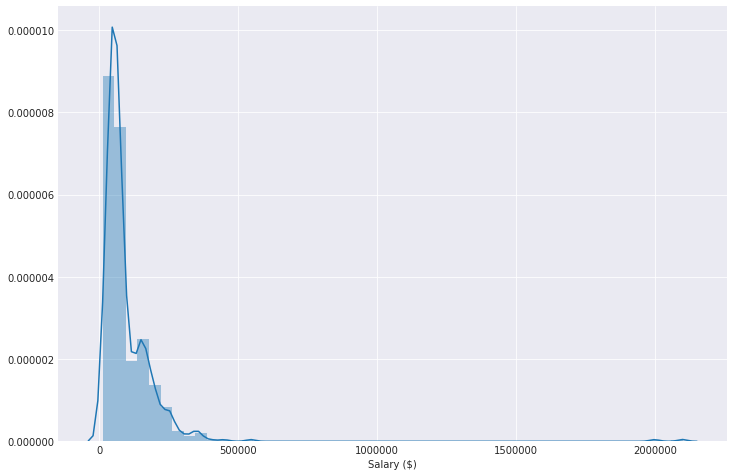

In [16]:
plt.figure(num=None, figsize=(12, 8))
ax = sns.distplot(df2['Salary'])
ax.xaxis.set_label_text('Salary ($)')

Text(0.5,0,'Log[Salary ($)]')

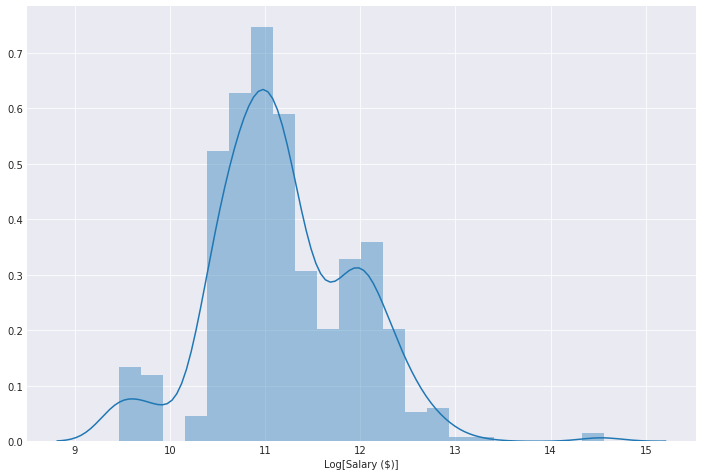

In [17]:
plt.figure(num=None, figsize=(12, 8))
ax = sns.distplot(df2['Log_Salary'])
ax.xaxis.set_label_text('Log[Salary ($)]')

In [18]:
corr2 = df2.corr()

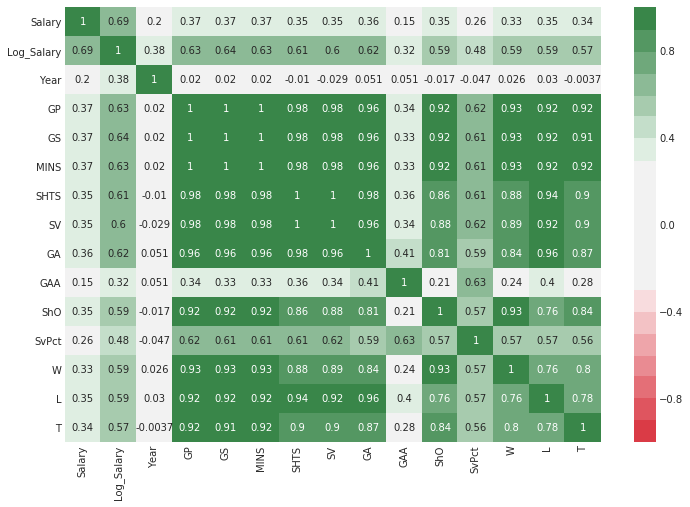

In [21]:
plt.figure(num=None, figsize=(12, 8))
sns.heatmap(corr2, center=0, cmap=sns.diverging_palette(10, 133, sep=80, n=20), vmin=-1, vmax=1, annot=True)
# plt.title('Correlation Heatmap')

Text(0.5,1,'Pairplot Matrix')

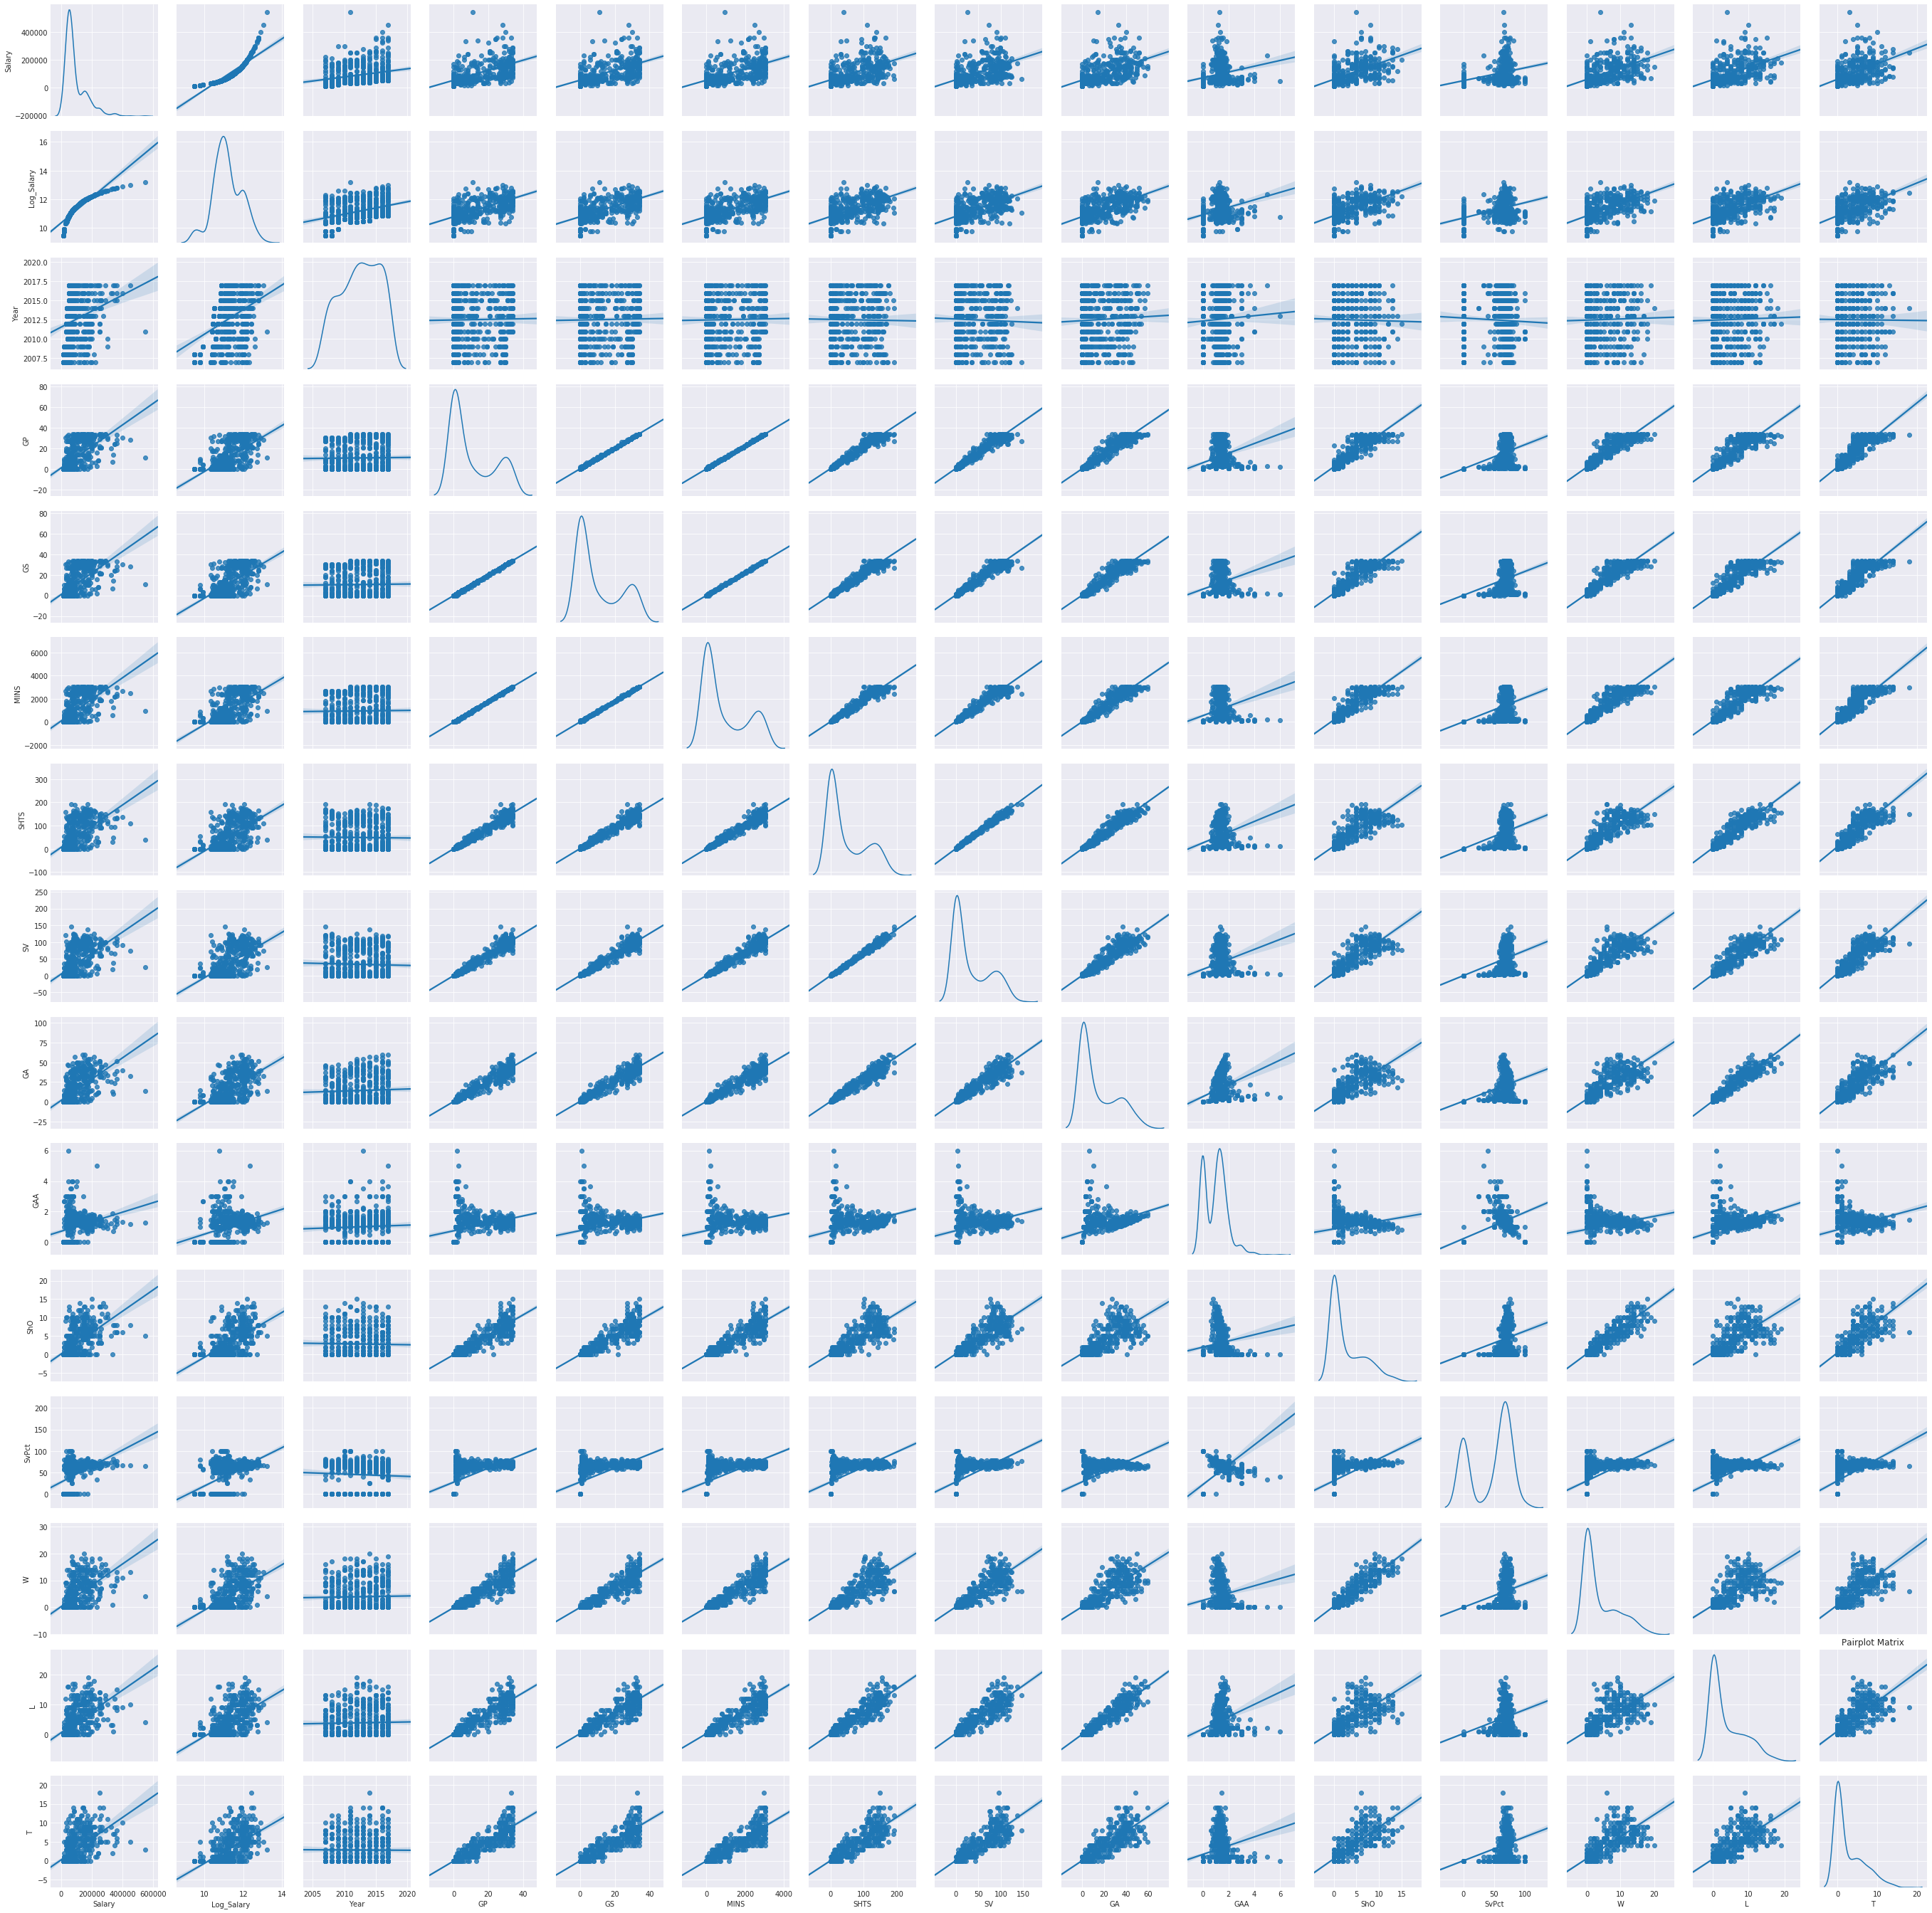

In [289]:
plt.figure(num=None)
# sns.pairplot(df2.iloc[:, 3:])
sns.pairplot(df2.iloc[:, 3:], diag_kind="kde", kind='reg')
plt.title('Pairplot Matrix')

### Statsmodels

In [307]:
# Setup the data
X = df2.iloc[:, 5:]
X['Intercept'] = np.ones((len(X), 1))
y = df2.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

# Create your model
model = sm.OLS(y_train, X_train, hasconst=True)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log_Salary   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     43.23
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           1.94e-67
Time:                        08:09:48   Log-Likelihood:                -268.82
No. Observations:                 405   AIC:                             565.6
Df Residuals:                     391   BIC:                             621.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0847      0.008     10.414      0.000       0.069       0.101
GP            -0.0055      0.084     -0.066      0.948      -0.170       0.159
GS             0.4279      0.100      4.295      0.000       0.232       0.624
MINS          -0.0055      0.002     -2.649      0.008      -0.010      -0.001
SHTS           0.0108      0.017      0.655      0.513      -0.022       0.043
SV            -0.0143      0.017     -0.831      0.406      -0.048       0.019
GA            -0.0168      0.019     -0.862      0.389      -0.055       0.021
GAA            0.0800      0.043      1.852      0.065      -0.005       0.165
ShO            0.0268      0.025      1.056      0.292      -0.023       0.077
SvPct          0.0025      0.001      1.917      0.056   -6.22e-05       0.005
W              0.1032      0.111      0.931      0.352      -0.115       0.321
L              0.1322      0.111      1.192      0.234      -0.086       0.350
T              0.1012      0.112      0.908      0.365      -0.118       0.320
Intercept   -159.8163     16.372     -9.761      0.000    -192.005    -127.628
==============================================================================
Omnibus:                       36.689   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.917
Skew:                           0.526   Prob(JB):                     2.42e-16
Kurtosis:                       4.776   Cond. No.                     1.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

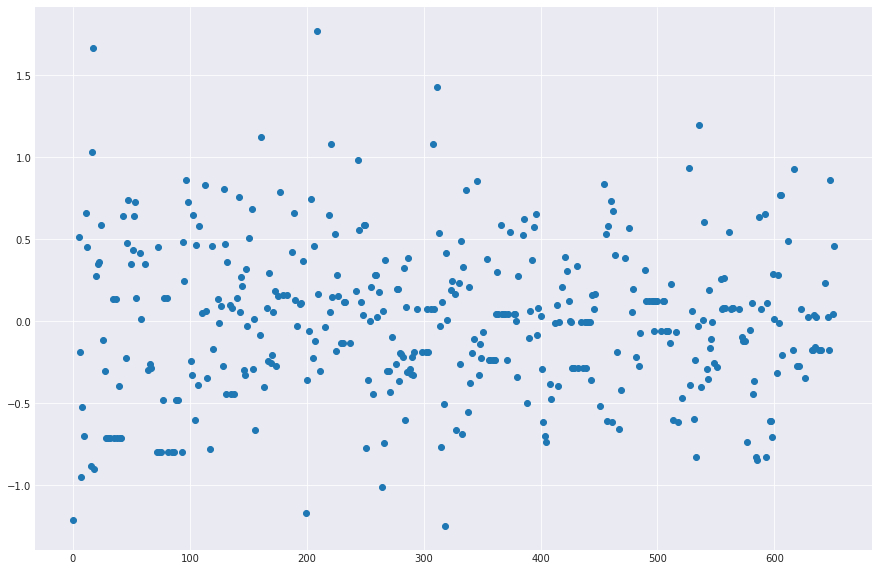

In [291]:
fit.resid.plot(style='o', figsize=(15,10))

### Sklearn

In [206]:
def rsquared_adj(model, X, y):
    return 1 - (1 - model.score(X, y)) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

In [242]:
r_est = make_pipeline(PolynomialFeatures(1, interaction_only=True), RidgeCV(fit_intercept=True, normalize=True))
r_est.fit(X_train, y_train)
r_est.score(X_test, y_test)
print('rsq:', r_est.score(X_test, y_test), 
      ', rsq_adj:', rsquared_adj(r_est, X_test, y_test))
print('alpha:', r_est.steps[1][1].alpha_)

rsq: 0.537678439643 , rsq_adj: 0.496970880869
alpha: 0.1


In [243]:
l_est = make_pipeline(PolynomialFeatures(1, interaction_only=True), LassoCV(fit_intercept=True, normalize=True))
l_est.fit(X_train, y_train)
l_est.score(X_test, y_test)
print('rsq:', l_est.score(X_test, y_test), 
      ', rsq_adj:', rsquared_adj(l_est, X_test, y_test))
print('alpha:', l_est.steps[1][1].alpha_)

rsq: 0.544762135259 , rsq_adj: 0.504678298112
alpha: 0.000591469671634


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [244]:
e_est = make_pipeline(PolynomialFeatures(1, interaction_only=True), ElasticNetCV(l1_ratio=0.975, fit_intercept=True, normalize=True))
e_est.fit(X_train, y_train)
e_est.score(X_test, y_test)
print('rsq:', e_est.score(X_test, y_test), 
      ', rsq_adj:', rsquared_adj(e_est, X_test, y_test))
print('alpha:', e_est.steps[1][1].alpha_)

rsq: 0.545551133866 , rsq_adj: 0.505536768295
alpha: 0.000372225954891


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [212]:
# Calculate Residuals
yhat = pd.Series(e_est.predict(X), name='Predicted')
residuals = yhat - y

Text(0.5,1,'Predicted vs. Actual Salary')

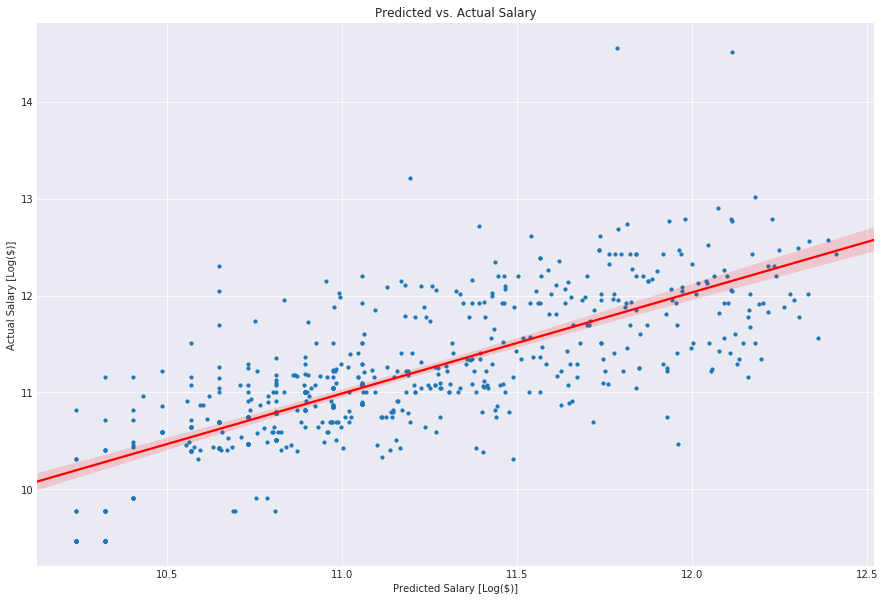

In [310]:
# Plot Fit
sns.set_style('darkgrid')
plt.figure(num=None, figsize=(15, 10))
ax = sns.regplot(yhat, y,
                 line_kws={'color':'red'}, 
                 scatter_kws={'alpha':1, 's':10});
ax.set_xlabel('Predicted Salary [Log($)]')
ax.set_ylabel('Actual Salary [Log($)]')
ax.set_title('Predicted vs. Actual Salary')

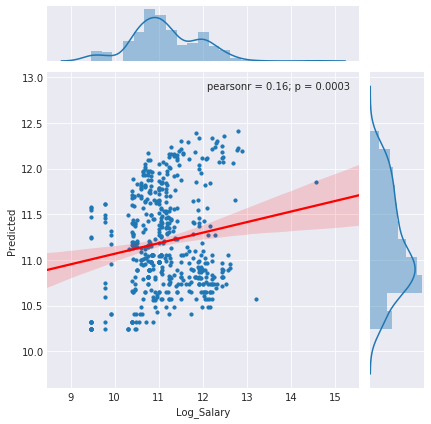

In [264]:
plt.figure(num=None, figsize=(15, 10))
ax = sns.jointplot(y, yhat, kind="reg",
                   line_kws={'color':'red'}, 
                   scatter_kws={'alpha':1, 's':10});


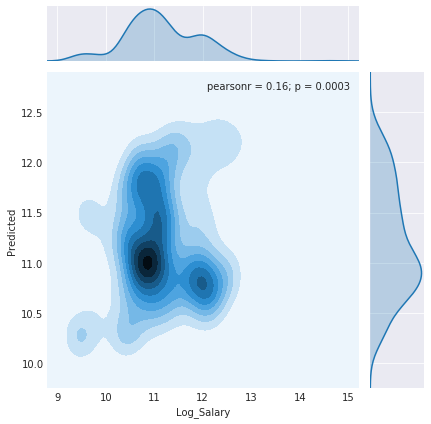

In [266]:
plt.figure(num=None, figsize=(15, 10))
# ax = sns.jointplot(y, yhat, kind='resid',
#                    line_kws={'color':'red'}, 
#                    scatter_kws={'alpha':1, 's':10});
sns.jointplot(y, yhat, kind='kde')


In [269]:
plt.figure(num=None, figsize=(15, 10))
# ax = sns.jointplot(y, yhat, kind='resid',
#                    line_kws={'color':'red'}, 
#                    scatter_kws={'alpha':1, 's':10});
sns.regplot(y, yhat, kind='kde')


TypeError: regplot() got an unexpected keyword argument 'kind'

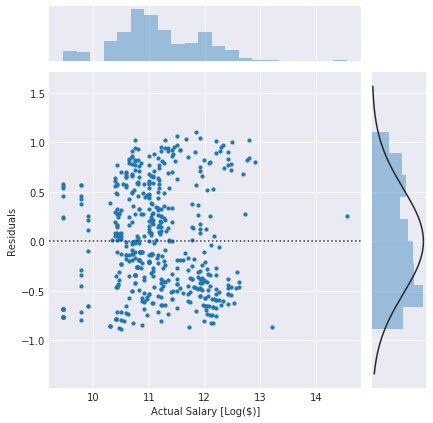

In [311]:
plt.figure(num=None, figsize=(15, 10))
ax = sns.jointplot(y, yhat, kind='resid',
                   line_kws={'color':'red'}, 
                   scatter_kws={'alpha':1, 's':10});
ax.set_axis_labels(ylabel='Residuals', xlabel='Actual Salary [Log($)]')

In [268]:
np.exp(1)

2.7182818284590451

Text(0.5,1,'Prediciton Residuals')

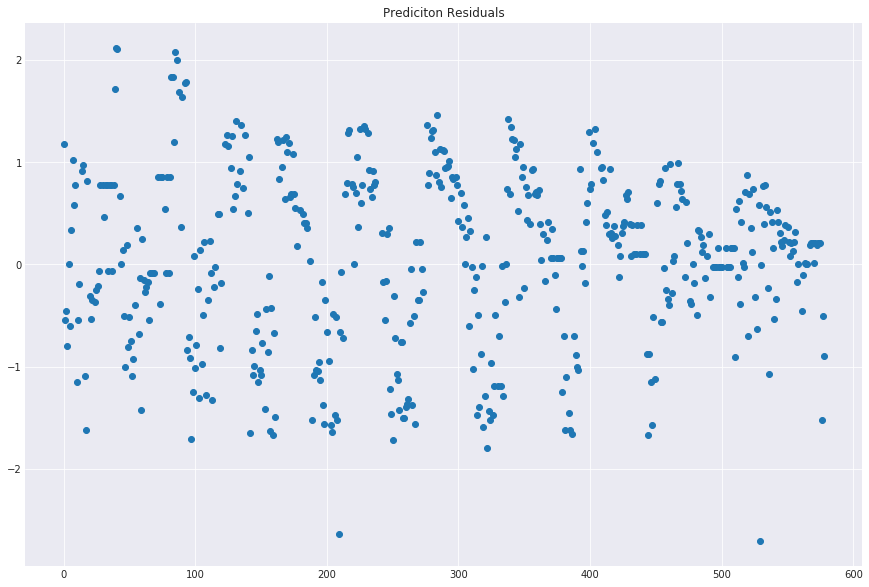

In [255]:
# Plot Residuals
plt.figure(num=None, figsize=(15, 10))

idx = np.random.permutation(np.arange(len(residuals)))
idx = np.arange(len(residuals))
ax = plt.scatter(idx, residuals)
plt.title('Prediciton Residuals')

# ax = sns.regplot(random_idx, residuals,
#                  line_kws={'color':'red'}, 
#                  scatter_kws={'alpha':1, 's':10});
# ax.set_ylabel('')
# ax.set_title('Prediction Residuals')

## Log-Log Modeling

In [164]:
df3 = df[['Player', 'Club', 'POS', 'Salary', 'Log_Salary']]

In [169]:
for col in df2.columns[5:]:
    df3['Log_' + col] = df[col].map(lambda x: np.log(x+1))

/home/cneiderer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [170]:
df3.head()

,Player,Club,POS,Salary,Log_Salary,Log_Year,Log_GP,Log_GS,Log_MINS,Log_SHTS,Log_SV,Log_GA,Log_GAA,Log_ShO,Log_SvPct,Log_W,Log_L,Log_T
0,Bouna Coundoul,COL,GK,30000.0,10.308953,7.604894,3.433987,3.433987,7.889459,5.068904,4.795791,3.496508,0.727549,2.302585,4.342506,2.302585,2.564949,2.197225
1,Kevin Hartman,KC,GK,150000.0,11.918391,7.604894,3.433987,3.433987,7.901377,5.075174,4.709530,3.828641,0.916291,1.791759,4.251348,2.484907,2.564949,2.079442
2,Matt Reis,NE,GK,150000.0,11.918391,7.604894,3.433987,3.433987,7.901377,5.135798,4.795791,3.784190,0.887891,2.397895,4.276666,2.708050,2.197225,2.197225
3,Joe Cannon,LA,GK,192000.0,12.165251,7.604894,3.401197,3.401197,7.867489,5.147494,4.787492,3.850148,0.951658,1.791759,4.257030,2.302585,2.639057,2.079442
4,Troy Perkins,DC,GK,85000.0,11.350407,7.604894,3.401197,3.401197,7.867489,5.049856,4.770685,3.496508,0.741937,2.197225,4.337291,2.833213,1.945910,2.079442


In [163]:
df3[df3.isnull().any(axis=1)]

,Player,Club,POS,Salary,Log_Salary,Year,GP,GS,MINS,SHTS,SV,GA,GAA,ShO,SvPct,W,L,T,Log_Year,Log_GP,Log_GS,Log_MINS,Log_SHTS,Log_SV,Log_GA,Log_GAA,Log_ShO,Log_SvPct,Log_W,Log_L,Log_T


In [171]:
corr3 = df3.corr()

Text(0.5,1,'Correlation Heatmap')

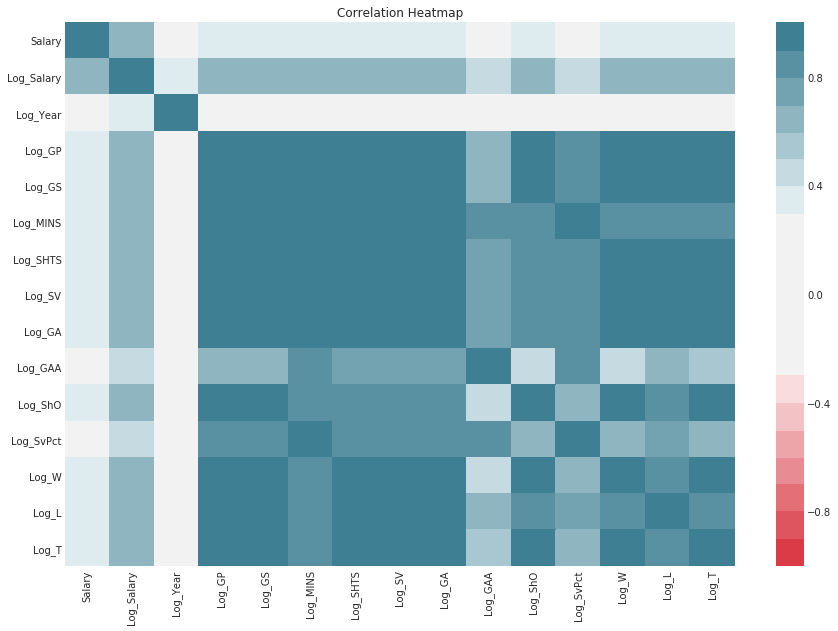

In [172]:
plt.figure(num=None, figsize=(15, 10))
sns.heatmap(corr3, center=0, cmap=sns.diverging_palette(10, 220, sep=80, n=20), vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

Text(0.5,1,'Pairplot Matrix')

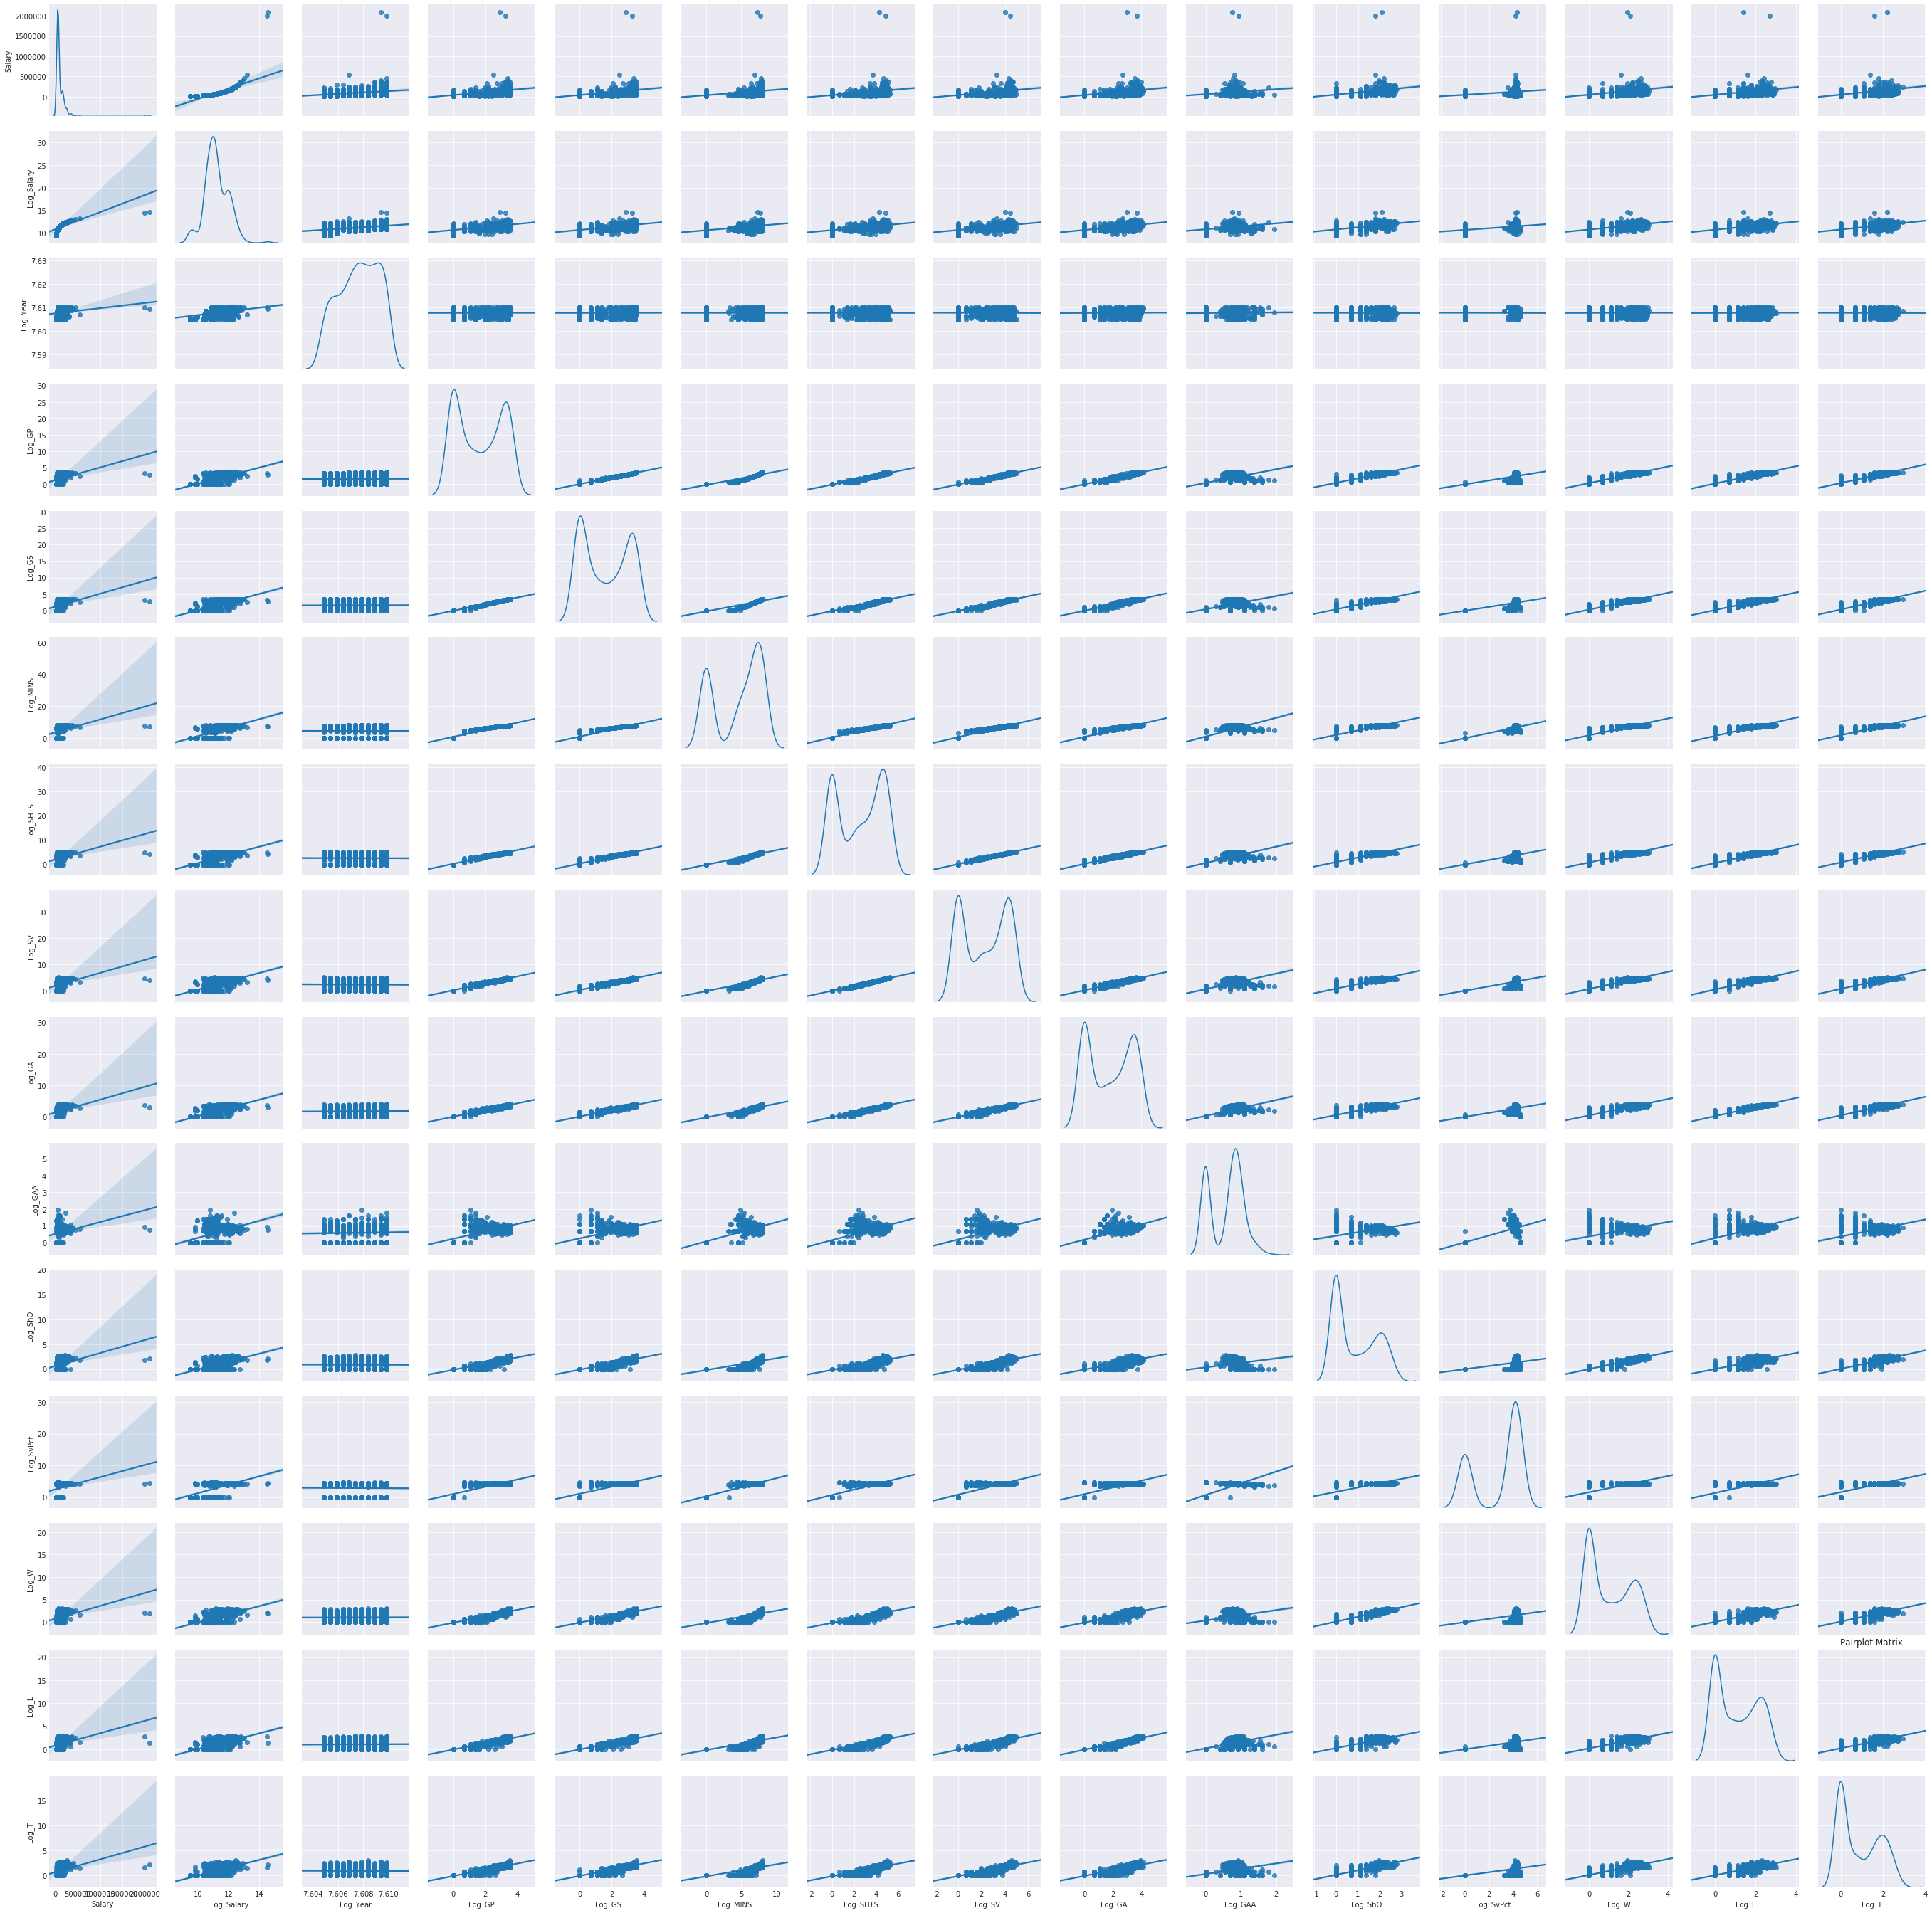

In [176]:
plt.figure(num=None)
# sns.pairplot(df3.iloc[:, 3:])
sns.pairplot(df3.iloc[:, 3:], diag_kind="kde", kind='reg')
plt.title('Pairplot Matrix')

### Statsmodels

In [177]:
# Setup the data
X = df3.iloc[:, 5:]
# X['Intercept'] = np.ones((len(X), 1))
y = df3.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

# Create your model
model = sm.OLS(y_train, X_train, hasconst=True)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log_Salary   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     27.29
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           1.08e-44
Time:                        20:59:19   Log-Likelihood:                -326.27
No. Observations:                 405   AIC:                             678.5
Df Residuals:                     392   BIC:                             730.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Log_Year       1.4030      0.006    225.518      0.000       1.391       1.415
Log_GP         0.1570      0.448      0.351      0.726      -0.723       1.037
Log_GS         0.7240      0.334      2.165      0.031       0.066       1.382
Log_MINS      -0.2494      0.220     -1.135      0.257      -0.681       0.182
Log_SHTS       0.2233      0.862      0.259      0.796      -1.471       1.917
Log_SV        -0.6464      0.637     -1.014      0.311      -1.899       0.607
Log_GA        -0.1067      0.384     -0.278      0.781      -0.861       0.648
Log_GAA        0.3258      0.461      0.707      0.480      -0.580       1.231
Log_ShO        0.0660      0.124      0.532      0.595      -0.178       0.310
Log_SvPct      0.2314      0.160      1.448      0.149      -0.083       0.546
Log_W          0.1604      0.165      0.973      0.331      -0.164       0.485
Log_L          0.1770      0.152      1.166      0.244      -0.121       0.476
Log_T          0.0640      0.140      0.457      0.648      -0.211       0.339
==============================================================================
Omnibus:                       19.286   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.144
Skew:                           0.034   Prob(JB):                     4.75e-12
Kurtosis:                       4.757   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sklearn

In [181]:
r_est = make_pipeline(PolynomialFeatures(2, interaction_only=True), RidgeCV(fit_intercept=True, normalize=True))
r_est.fit(X_train, y_train)
r_est.score(X_test, y_test)
print('rsq:', r_est.score(X_test, y_test), ', rsq_adj:', rsquared_adj(r_est, X_test, y_test))

rsq: 0.54705638783 , rsq_adj: 0.510254719342


In [182]:
l_est = make_pipeline(PolynomialFeatures(2, interaction_only=True), LassoCV(fit_intercept=True, normalize=True))
l_est.fit(X_train, y_train)
l_est.score(X_test, y_test)
print('rsq:', l_est.score(X_test, y_test), ', rsq_adj:', rsquared_adj(l_est, X_test, y_test))

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


rsq: 0.548628568463 , rsq_adj: 0.511954639651


In [183]:
e_est = make_pipeline(PolynomialFeatures(2, interaction_only=True), ElasticNetCV(l1_ratio=0.975, fit_intercept=True, normalize=True))
e_est.fit(X_train, y_train)
e_est.score(X_test, y_test)
print('rsq:', e_est.score(X_test, y_test), ', rsq_adj:', rsquared_adj(e_est, X_test, y_test))

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


rsq: 0.551687770182 , rsq_adj: 0.51526240151


## Combo Modeling

In [190]:
df4 = df2.merge(df3, on=['Player', 'Club', 'POS', 'Salary', 'Log_Salary'])

### Statsmodels

In [192]:
# Setup the data
X = df4.iloc[:, 5:]
# X['Intercept'] = np.ones((len(X), 1))
y = df4.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

# Create your model
model = sm.OLS(y_train, X_train, hasconst=True)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log_Salary   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     24.93
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           2.69e-66
Time:                        21:08:59   Log-Likelihood:                -293.47
No. Observations:                 426   AIC:                             638.9
Df Residuals:                     400   BIC:                             744.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.1061      0.009     11.219      0.000       0.088       0.125
GP             0.0418      0.158      0.265      0.791      -0.268       0.352
GS             0.5774      0.125      4.623      0.000       0.332       0.823
MINS          -0.0064      0.003     -2.532      0.012      -0.011      -0.001
SHTS          -0.0005      0.019     -0.026      0.980      -0.039       0.038
SV             0.0009      0.021      0.045      0.964      -0.040       0.042
GA            -0.0023      0.025     -0.093      0.926      -0.051       0.046
GAA            0.0014      0.162      0.009      0.993      -0.318       0.321
ShO            0.0692      0.040      1.750      0.081      -0.009       0.147
SvPct          0.0037      0.005      0.680      0.497      -0.007       0.014
W             -0.0663      0.123     -0.540      0.590      -0.308       0.175
L             -0.0202      0.127     -0.159      0.874      -0.270       0.230
T             -0.0331      0.123     -0.270      0.787      -0.274       0.208
Log_Year     -26.6787      2.503    -10.659      0.000     -31.599     -21.758
Log_GP        -0.0122      0.752     -0.016      0.987      -1.491       1.467
Log_GS        -0.2830      0.410     -0.691      0.490      -1.088       0.522
Log_MINS       0.1720      0.258      0.668      0.505      -0.334       0.678
Log_SHTS      -0.5503      0.878     -0.627      0.531      -2.276       1.175
Log_SV         0.1500      0.732      0.205      0.838      -1.289       1.589
Log_GA         0.3208      0.548      0.586      0.558      -0.756       1.397
Log_GAA        0.0500      0.693      0.072      0.942      -1.311       1.411
Log_ShO       -0.2999      0.175     -1.714      0.087      -0.644       0.044
Log_SvPct     -0.0439      0.177     -0.249      0.804      -0.391       0.303
Log_W          0.3661      0.200      1.834      0.067      -0.026       0.758
Log_L          0.1363      0.210      0.648      0.517      -0.277       0.550
Log_T          0.2226      0.166      1.340      0.181      -0.104       0.549
==============================================================================
Omnibus:                       26.548   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.202
Skew:                           0.423   Prob(JB):                     2.52e-10
Kurtosis:                       4.332   Cond. No.                     2.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Sklearn

In [193]:
r_est = make_pipeline(PolynomialFeatures(2, interaction_only=True), RidgeCV(fit_intercept=True, normalize=True))
r_est.fit(X_train, y_train)
r_est.score(X_test, y_test)
print('rsq:', r_est.score(X_test, y_test), ', rsq_adj:', rsquared_adj(r_est, X_test, y_test))

rsq: 0.633394281924 , rsq_adj: 0.572293328911


In [194]:
l_est = make_pipeline(PolynomialFeatures(2, interaction_only=True), LassoCV(fit_intercept=True, normalize=True))
l_est.fit(X_train, y_train)
l_est.score(X_test, y_test)
print('rsq:', l_est.score(X_test, y_test), ', rsq_adj:', rsquared_adj(l_est, X_test, y_test))

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


rsq: 0.633128885738 , rsq_adj: 0.571983700028


In [195]:
e_est = make_pipeline(PolynomialFeatures(2, interaction_only=True), ElasticNetCV(l1_ratio=0.975, fit_intercept=True, normalize=True))
e_est.fit(X_train, y_train)
e_est.score(X_test, y_test)
print('rsq:', e_est.score(X_test, y_test), ', rsq_adj:', rsquared_adj(e_est, X_test, y_test))

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


rsq: 0.633858042584 , rsq_adj: 0.572834383015


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [ ]:
df.head()

In [ ]:
# Setup the data
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 5:], df.iloc[:, 0], test_size=0.3, random_state=129)

# Create your model
model = sm.OLS(y_train, X_train)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

In [ ]:
# Setup the data
X = df.iloc[:, 5:]
# X['Intercept'] = np.ones((len(X), 1))
y = df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

# Create your model
model = sm.OLS(y_train, X_train, hasconst=False)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

In [ ]:
fit.resid.plot(style='o', figsize=(12,8));

In [ ]:
# Setup the data
X = df3.iloc[:, 5:]
# X = df3.iloc[:, 19:]
# X['Intercept'] = np.ones((len(X), 1))
y = df3.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

# Create your model
model = sm.OLS(y_train, X_train, hasconst=False)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

In [ ]:
fit.resid.plot(style='o', figsize=(12,8));

In [ ]:
est = make_pipeline(PolynomialFeatures(2, interaction_only=True), LinearRegression())
est.fit(X_train, y_train)
est.score(X_test, y_test)

In [ ]:
lr = LinearRegression(fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
lr = RidgeCV(fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
lr = LassoCV(fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
lr = ElasticNetCV(l1_ratio=0.025, fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

### Sandbox

In [ ]:
df3.head()

In [ ]:
# # Setup the data
# # X = df3.iloc[:, 5:]
# X = sm.add_constant(df[['GS', 'MINS', 'ShO']])
# # y = df3.iloc[:, 0]
# # y = df3['Salary']
# y = df3['Log_Salary']

# X = df3.iloc[:, 6]
# X = sm.add_constant(df3.iloc[:, 6])

df4 = df3[df3.GP > 0]
X = sm.add_constant(df4.iloc[:, list(np.arange(8,16)) + [17,18]])
y = df4['ShO'] #.map(lambda x: np.log(x+1))

In [ ]:
plt.figure(num=None, figsize=(15, 10))
sns.heatmap(corr3, center=0, cmap=sns.diverging_palette(10, 220, sep=80, n=20), vmin=-1, vmax=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

# Create your model
model = sm.OLS(y_train, X_train, hasconst=True)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

In [ ]:
fit.resid.plot(style='o', figsize=(12,8));

In [ ]:
lr = LinearRegression(fit_intercept=True, normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.coef_

In [ ]:
lr = RidgeCV(fit_intercept=True, normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
lr.coef_

In [ ]:
lr = LassoCV(fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
X.columns

In [ ]:
lr.coef_

In [ ]:
lr = ElasticNetCV(l1_ratio=0.95, fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
yhat = pd.Series(fit.predict(X_test), name='Pred_ShO')

plt.figure(num=None, figsize=(15, 10))
plt.scatter(yhat, y_test)
plt.xlabel('yhat')
plt.ylabel('ytest')

In [ ]:
sns.pairplot(X.join(y), diag_kind="kde", kind='reg')

In [ ]:
g = sns.PairGrid(X.join(y)) 
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(sns.kdeplot, lw=3, legend=False) 

In [ ]:
plt.figure(num=None, figsize=(15, 10))
sns.regplot(yhat, y_test);

In [ ]:
corr3 = X.join(y).corr()
corr3

In [ ]:
sns.pairplot(X.join(y))

In [ ]:
# 
alphas = np.logspace(-9, 9, num=19)
rscores = np.zeros(len(alphas))
lscores = np.zeros(len(alphas))
escores = np.zeros(len(alphas))
for ii, a in enumerate(alphas):    
    # RidgeCV
    rcv = RidgeCV(cv=10, alphas=[a], fit_intercept=True)
    rcv.fit(X, y)
    rscores[ii] = rcv.score(X, y)
    # LassoCV
    lcv = LassoCV(cv=10, alphas=[a], fit_intercept=True)
    lcv.fit(X, y)
    lscores[ii] = lcv.score(X, y)    
    # ElasticNetCV
    ecv = ElasticNetCV(cv=10, alphas=[a], l1_ratio=0.5, fit_intercept=True)
    ecv.fit(X, y)
    escores[ii] = ecv.score(X, y)

In [ ]:
np.array([alphas, rscores, lscores, escores]).T

In [ ]:
# Plot the alpha vs. scores
plt.figure(figsize=(8,6))
plt.semilogx(alphas, rscores, color='g', label='Ridge')
plt.semilogx(alphas, lscores, color='b', label='Lasso')
plt.semilogx(alphas, escores, color='r', label='ElasticNet')
plt.ylim((0.0, 1e0))
plt.ylabel('R^2')
plt.xlabel('alpha')
plt.title('Regularized Regression Comparsion')
plt.legend(loc='lower left')

In [ ]:
lr = Ridge(alpha=100, fit_intercept=True, normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
coef = {}
for idx, c in enumerate(X.columns):
    coef[c] = lr.coef_[idx]

In [ ]:
coef

In [ ]:
lr = Lasso(alpha=0.01, fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
lr = ElasticNet(alpha=0.01, l1_ratio=0.5, fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)